## Preprocessing

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
### extract headers as they contain white spaces
colnames = pd.read_csv("data/breast-cancer-diagnostic.shuf.lrn.csv", header = None, nrows=1)
header = []
for i in range(0,32):
    header.append(colnames.iloc[0, i].strip())

### read data set
cancer = pd.read_csv("data/breast-cancer-diagnostic.shuf.lrn.csv", header = None, names = header, skiprows=1, index_col=False)


In [189]:
### Overview
print(header)
print(cancer.head())

['ID', 'class', 'radiusMean', 'textureMean', 'perimeterMean', 'areaMean', 'smoothnessMean', 'compactnessMean', 'concavityMean', 'concavePointsMean', 'symmetryMean', 'fractalDimensionMean', 'radiusStdErr', 'textureStdErr', 'perimeterStdErr', 'areaStdErr', 'smoothnessStdErr', 'compactnessStdErr', 'concavityStdErr', 'concavePointsStdErr', 'symmetryStdErr', 'fractalDimensionStdErr', 'radiusWorst', 'textureWorst', 'perimeterWorst', 'areaWorst', 'smoothnessWorst', 'compactnessWorst', 'concavityWorst', 'concavePointsWorst', 'symmetryWorst', 'fractalDimensionWorst']
        ID class  radiusMean  textureMean  perimeterMean  areaMean  \
0   868682     B       11.43        15.39          73.06     399.8   
1   881972     M       17.05        19.08         113.40     895.0   
2   901315     B       10.57        20.22          70.15     338.3   
3  9112367     B       13.21        25.25          84.10     537.9   
4  8711202     M       17.68        20.74         117.40     963.7   

   smoothnessM

In [190]:
### check Data Types
cancer.info()
# class should be nominal
cancer["class"] = cancer["class"].astype("category")
### there are no missing values
cancer.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 32 columns):
ID                        285 non-null int64
class                     285 non-null object
radiusMean                285 non-null float64
textureMean               285 non-null float64
perimeterMean             285 non-null float64
areaMean                  285 non-null float64
smoothnessMean            285 non-null float64
compactnessMean           285 non-null float64
concavityMean             285 non-null float64
concavePointsMean         285 non-null float64
symmetryMean              285 non-null float64
fractalDimensionMean      285 non-null float64
radiusStdErr              285 non-null float64
textureStdErr             285 non-null float64
perimeterStdErr           285 non-null float64
areaStdErr                285 non-null float64
smoothnessStdErr          285 non-null float64
compactnessStdErr         285 non-null float64
concavityStdErr           285 non-null float64
conca

ID                        0
class                     0
radiusMean                0
textureMean               0
perimeterMean             0
areaMean                  0
smoothnessMean            0
compactnessMean           0
concavityMean             0
concavePointsMean         0
symmetryMean              0
fractalDimensionMean      0
radiusStdErr              0
textureStdErr             0
perimeterStdErr           0
areaStdErr                0
smoothnessStdErr          0
compactnessStdErr         0
concavityStdErr           0
concavePointsStdErr       0
symmetryStdErr            0
fractalDimensionStdErr    0
radiusWorst               0
textureWorst              0
perimeterWorst            0
areaWorst                 0
smoothnessWorst           0
compactnessWorst          0
concavityWorst            0
concavePointsWorst        0
symmetryWorst             0
fractalDimensionWorst     0
dtype: int64

In [5]:
cancer.iloc[:,1:].describe()

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,radiusStdErr,textureStdErr,perimeterStdErr,areaStdErr,smoothnessStdErr,compactnessStdErr,concavityStdErr,concavePointsStdErr,symmetryStdErr,fractalDimensionStdErr,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,13.857832,19.310000,90.076070,625.102105,0.095960,0.101917,0.084848,0.046362,0.180695,0.062898,0.381560,1.265625,2.688862,35.582670,0.007287,0.025752,0.032762,0.012112,0.020977,0.003909,15.823884,25.665825,104.135123,823.488421,0.132186,0.249617,0.265468,0.112228,0.290091,0.083933
std,3.252277,4.277718,22.227367,310.526144,0.013481,0.048350,0.073680,0.034868,0.028748,0.007271,0.209815,0.604729,1.449513,28.148884,0.003228,0.017407,0.032761,0.006495,0.008446,0.002756,4.361540,6.128468,29.847173,482.465945,0.022661,0.151791,0.201241,0.063620,0.067542,0.018766
min,7.729000,9.710000,47.920000,178.800000,0.052630,0.023440,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.003012,0.000000,0.000000,0.007882,0.000895,8.952000,12.020000,56.650000,240.100000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.570000,16.170000,74.200000,409.100000,0.086370,0.064920,0.030460,0.021680,0.161900,0.057810,0.235700,0.855400,1.670000,18.150000,0.005324,0.013310,0.015100,0.007711,0.015270,0.002248,12.840000,21.190000,83.850000,505.600000,0.117200,0.146000,0.116800,0.063430,0.247700,0.072070
50%,13.150000,18.910000,84.450000,536.900000,0.095940,0.092180,0.059280,0.032640,0.177800,0.061470,0.319700,1.169000,2.284000,24.280000,0.006494,0.021210,0.026110,0.011430,0.019160,0.003299,14.670000,25.440000,96.310000,657.000000,0.130300,0.211900,0.210200,0.099100,0.280400,0.079440
75%,15.490000,21.800000,102.500000,748.900000,0.104600,0.129600,0.120400,0.065760,0.195300,0.066080,0.474300,1.502000,3.312000,44.910000,0.008499,0.033680,0.043450,0.015380,0.023830,0.004672,18.070000,30.360000,121.200000,989.500000,0.146100,0.341600,0.382900,0.156100,0.316800,0.091870
max,27.220000,33.810000,182.100000,2250.000000,0.142500,0.283900,0.410800,0.187800,0.304000,0.097440,1.370000,4.885000,9.424000,176.500000,0.031130,0.100600,0.396000,0.052790,0.061460,0.029840,33.120000,45.410000,220.800000,3216.000000,0.222600,1.058000,1.105000,0.273300,0.663800,0.207500


## Statistical Analysis

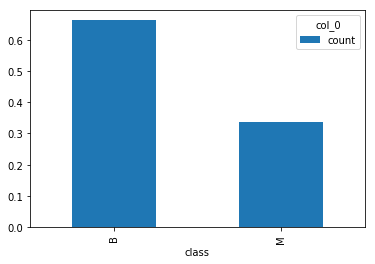

In [6]:
# class distribution
class_table = pd.crosstab(cancer["class"], columns = "count")
class_table = class_table/class_table.sum()
class_table.plot(kind = "bar")

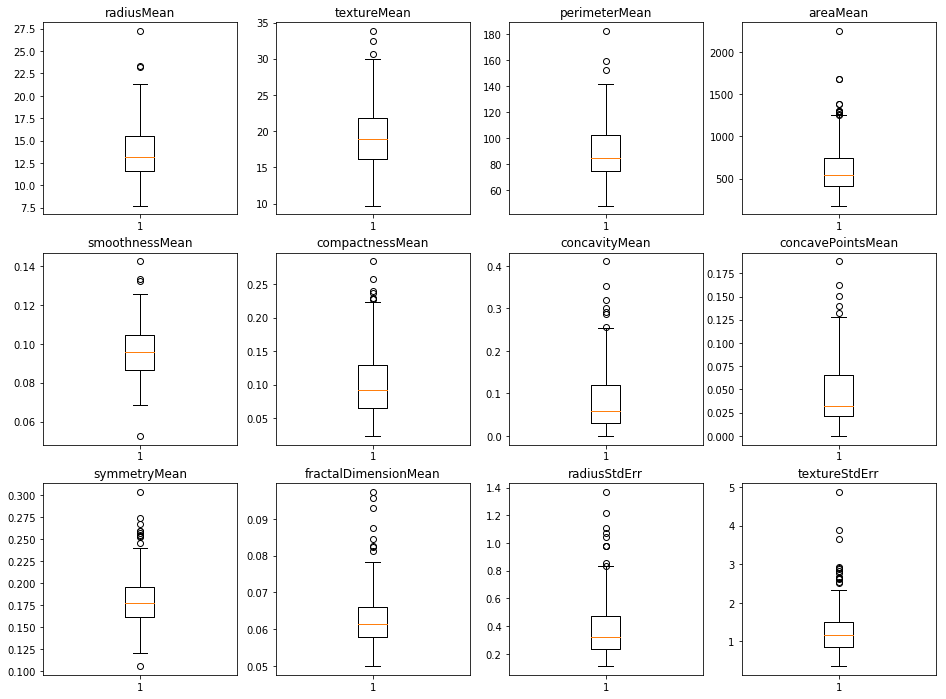

In [8]:
fig, axlist = plt.subplots(3,4,figsize=(16,12))
variable = 2
for row in range(0,3):
    for i in range(0,4):
        axlist[row][i].boxplot(cancer[header[variable]])
        axlist[row][i].set_title(header[variable])
        variable += 1
        
### There are some outliers but the distributions seems normal to me. I suggest that we leave it like that or cut
#   extreme outliers like in areaMean to achieve more accuracy for the "average" cases which are more important in ML
#   as special cases are always hard to predict

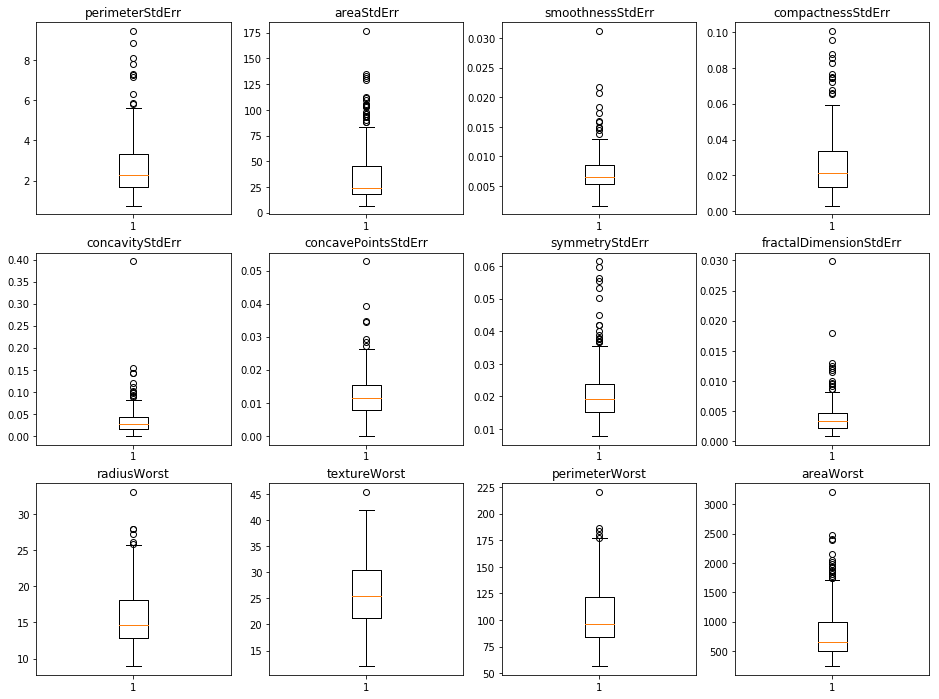

In [9]:
fig, axlist = plt.subplots(3,4,figsize=(16,12))
for row in range(0,3):
    for i in range(0,4):
        axlist[row][i].boxplot(cancer[header[variable]])
        axlist[row][i].set_title(header[variable])
        variable += 1
        
### same is here. maybe cut some extreme outliers like concavityStdErr and others.

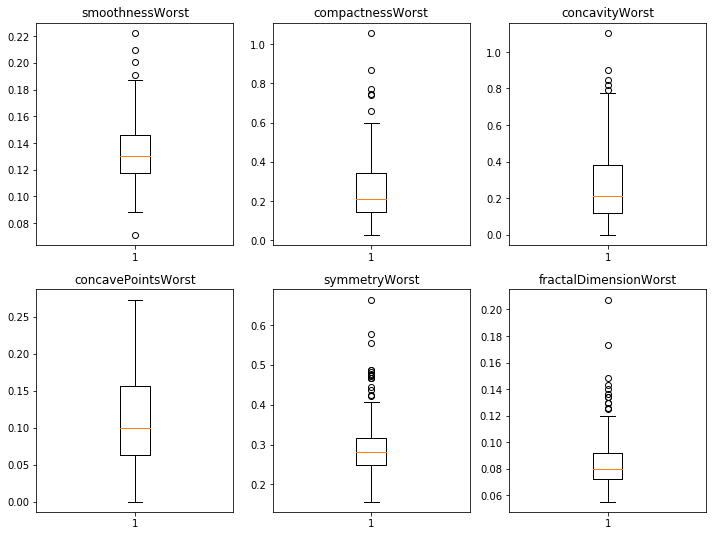

In [10]:
fig, axlist = plt.subplots(2,3,figsize=(12,9))
for row in range(0,2):
    for i in range(0,3):
        axlist[row][i].boxplot(cancer[header[variable]])
        axlist[row][i].set_title(header[variable])
        variable += 1

### same

In [104]:
###
# 285 observations
# 32 columns(index 0 is ID and index 1 is classification var)
# all variable are floats and don't need to be further processed for now
# classification is binary (B, M)

280      869691
281      871149
282    84667401
283      912558
284      917080
Name: ID, dtype: int64

## Experiments

In [191]:
import statistics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
### to use recall precision in cross_validate
from sklearn.metrics.scorer import make_scorer


### extract means and stdevs of recall and precision
def get_mean(accumulator):
    rval = []
    for j in range(len(accumulator[0])):
        current = []
        for i in accumulator:
            current.append(i[j])
        rval.append(statistics.mean(current))
    return rval

def get_std(accumulator):
    rval = []
    for j in range(len(accumulator[0])):
        current = []
        for i in accumulator:
            current.append(i[j])
        rval.append(statistics.stdev(current))
    return rval

from sklearn.metrics import recall_score, precision_score





In [192]:
Xdata = cancer.iloc[:,2:31]
Ydata = cancer.iloc[:,1]

## kNN

In [193]:
### Function to experiment with kNN
def knn_test(Xdata, Ydata, weights = "uniform", algorithm = "brute"):
    accuracy_mean = []
    accuracy_std = []
    fit_time = []
    score_time = []
    number_of_classes = len(Ydata.unique())

    ### list for each target class
    precision_mean = [ [] for i in range(number_of_classes) ]
    precision_std = [ [] for i in range(number_of_classes) ]
    recall_mean = [ [] for i in range(number_of_classes) ]
    recall_std = [ [] for i in range(number_of_classes) ]  
    recall_accumulator = []
    precision_accumulator = []
    ### always specify a list to save results before every call
    def my_precision(y_true, y_pred, **kwargs):
        precisions = precision_score(y_true, y_pred, **kwargs)
        nonlocal precision_accumulator
        precision_accumulator.append(precisions)
        return precisions.mean()

    ### always specify a list to save results before every call
    def my_recall(y_true, y_pred, **kwargs):
        recalls = recall_score(y_true, y_pred, **kwargs)
        nonlocal recall_accumulator
        recall_accumulator.append(recalls)
        return recalls.mean()
    scoring = {"accuracy":"accuracy", "precision":make_scorer(my_precision, average=None), "recall":make_scorer(my_recall, average=None)}

    for i in range(2,101):
        knn = KNeighborsClassifier(i, weights=weights, algorithm = algorithm)
        recall_accumulator = []
        precision_accumulator = []
        scores = cross_validate(knn, Xdata, Ydata, cv=10, scoring=scoring, return_train_score=False)
        accuracy_mean.append(scores["test_accuracy"].mean())
        accuracy_std.append(scores["test_accuracy"].std())
        fit_time.append(scores["fit_time"].mean())
        score_time.append(scores["score_time"].mean())
        
        prec_means = get_mean(precision_accumulator)
        prec_stds = get_std(precision_accumulator)
        rec_means = get_mean(recall_accumulator)
        rec_stds = get_std(recall_accumulator)
        

             
        for i in range(number_of_classes):
            precision_mean[i].append(prec_means[i])
            precision_std.append(prec_stds[i])
            recall_mean[i].append(rec_means[i])
            recall_std[i].append(rec_stds[i])

        
    #Plot
    plt.figure(figsize=(16, 10))
    plt.subplot(2,2,1)
    plt.plot(accuracy_mean)
    plt.plot(accuracy_std)
    plt.title("Accuracy")
    plt.xlabel("k")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,2)
    for i in range(number_of_classes):
        plt.plot(precision_mean[i])
    plt.legend(sorted(Ydata.unique()))
    plt.title("Precision")
    plt.xlabel("k")
    plt.subplot(2,2,3)
    for i in range(number_of_classes):
        plt.plot(recall_mean[i])
    plt.legend(sorted(Ydata.unique()))
    plt.title("Recall")
    plt.xlabel("k")
    plt.legend(sorted(Ydata.unique()))
    plt.subplot(2,2,4)
    plt.plot(fit_time)
    plt.plot(score_time)
    plt.title("Time")
    plt.xlabel("k")
    plt.legend(("Fit Time", "Score Time"))

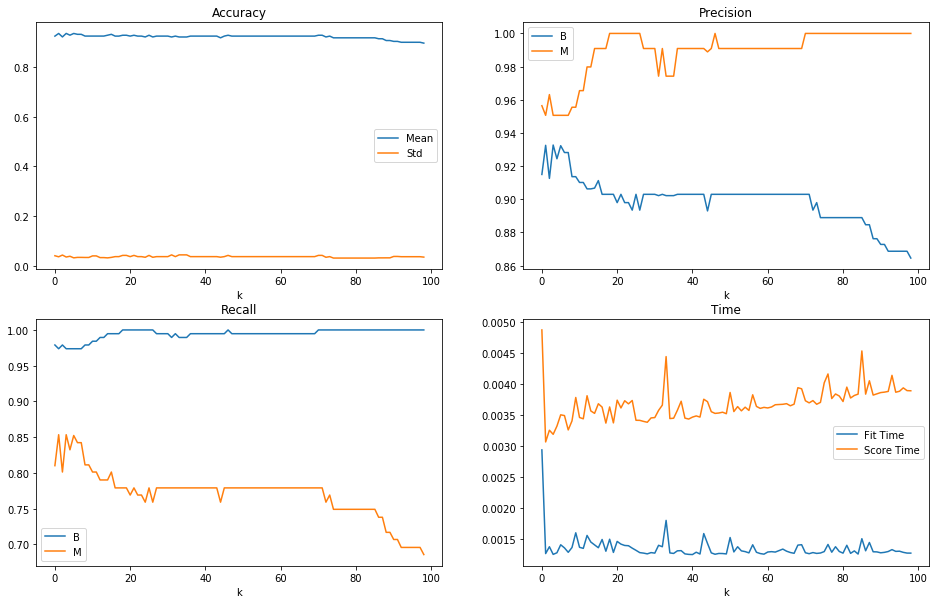

In [194]:
knn_test(Xdata, Ydata, weights = "uniform", algorithm = "brute")

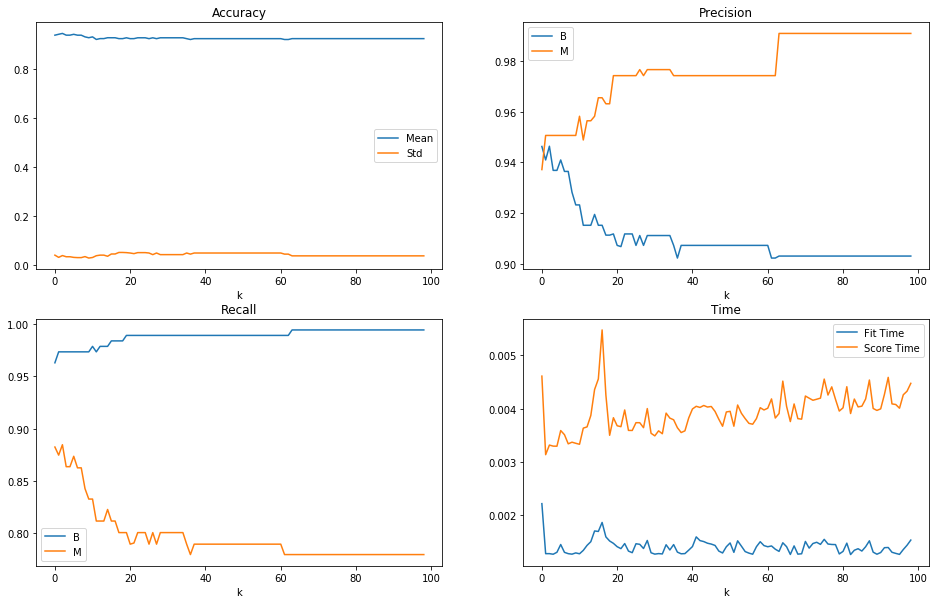

In [195]:
knn_test(Xdata, Ydata, weights="distance", algorithm="brute")

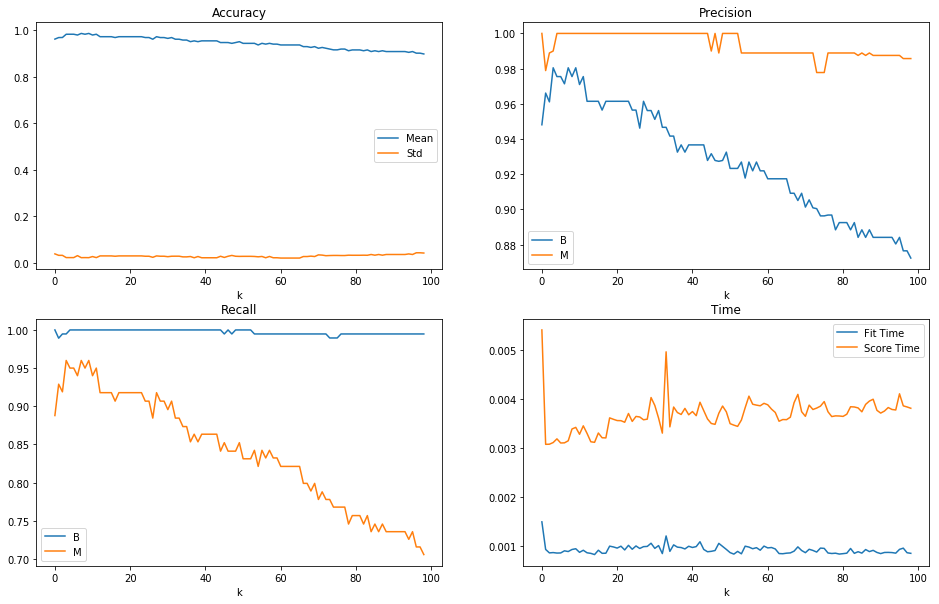

In [196]:
### scale [0, 1]
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata)

knn_test(X_minmax, Ydata, weights="uniform", algorithm="brute")

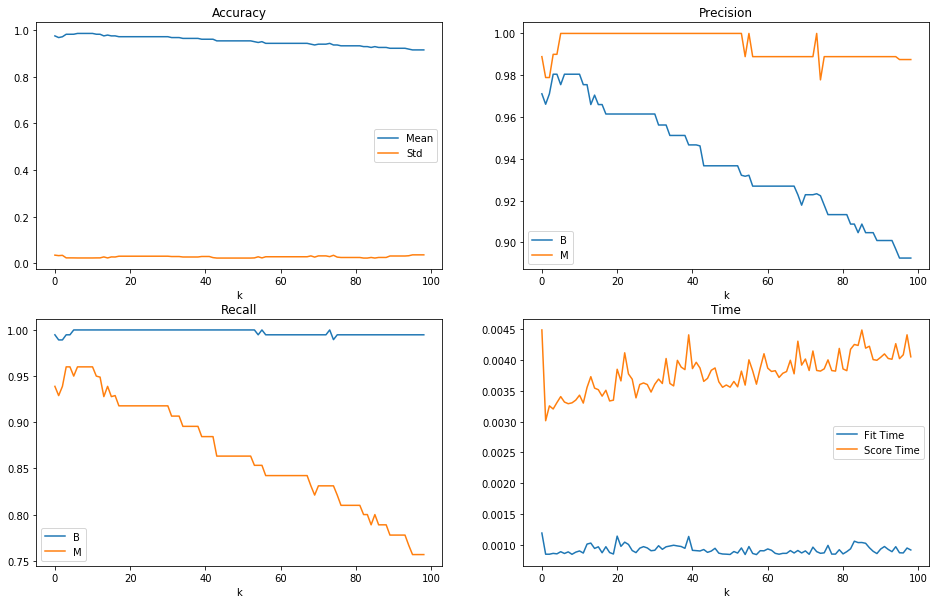

In [197]:
### scale [0, 1]
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata)

knn_test(X_minmax, Ydata, weights="distance", algorithm = "brute")

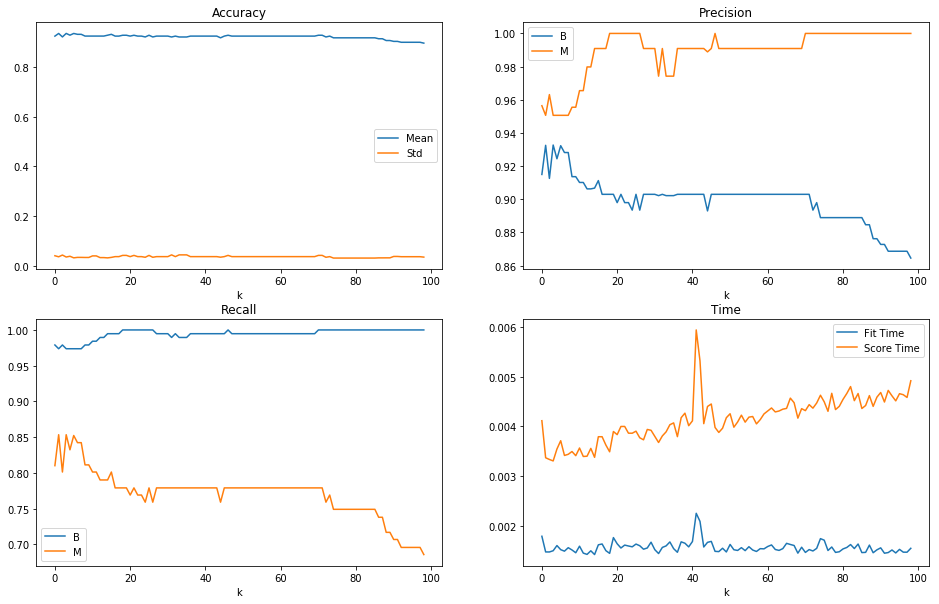

In [198]:
knn_test(Xdata, Ydata, weights="uniform", algorithm="kd_tree")

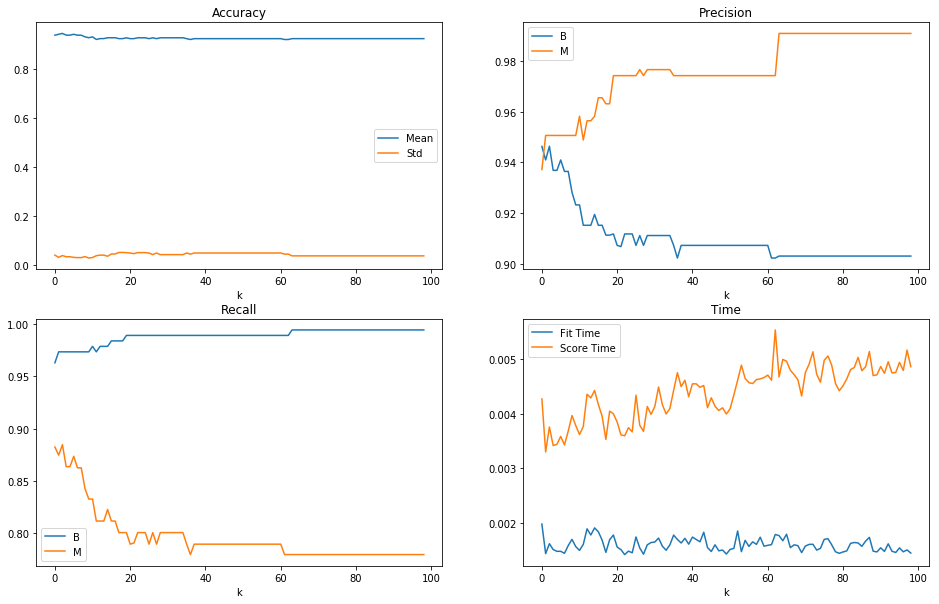

In [200]:
knn_test(Xdata, Ydata, weights="distance", algorithm="kd_tree")

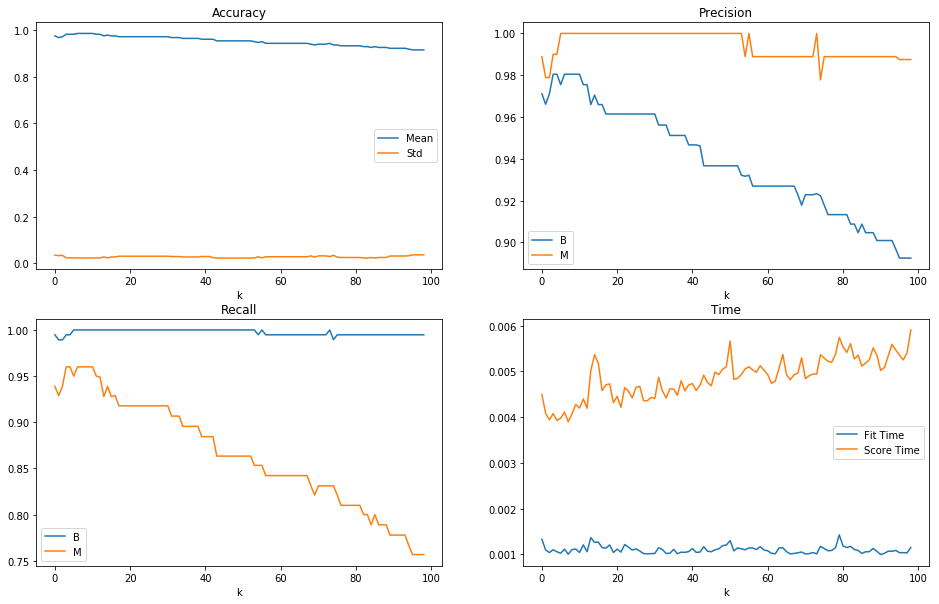

In [201]:
### scale [0, 1]
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata)

knn_test(X_minmax, Ydata, weights="distance", algorithm="kd_tree")

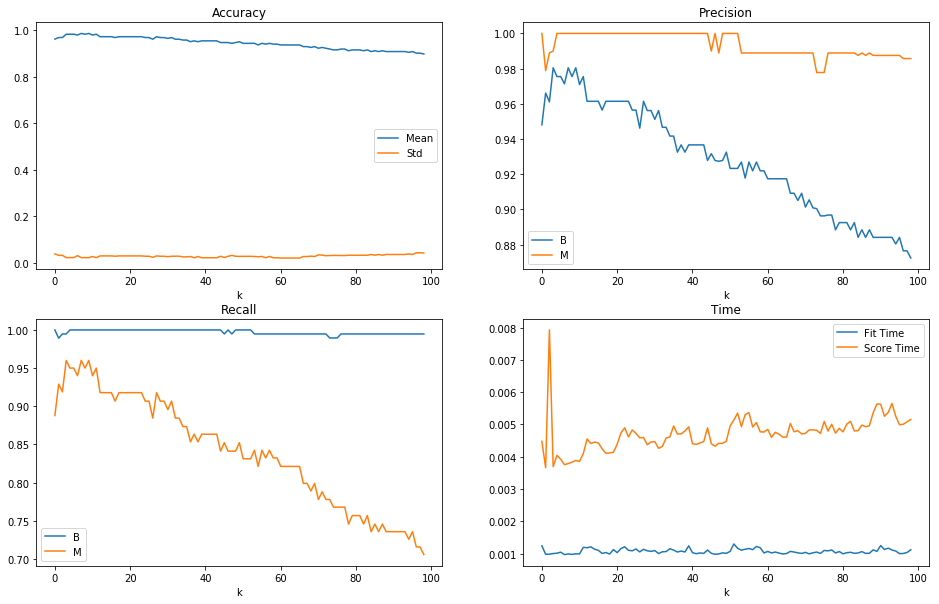

In [202]:
### scale [0, 1]
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata)

knn_test(X_minmax, Ydata, weights="uniform", algorithm="kd_tree")

## Naive Bayes

In [203]:
def naive_test(classifier, Xdata, Ydata):
    precision_accumulator = []
    recall_accumulator = []
    def my_precision(y_true, y_pred, **kwargs):
        precisions = precision_score(y_true, y_pred, **kwargs)
        nonlocal precision_accumulator
        precision_accumulator.append(precisions)
        return precisions.mean()

    ### always specify a list to save results before every call
    def my_recall(y_true, y_pred, **kwargs):
        recalls = recall_score(y_true, y_pred, **kwargs)
        nonlocal recall_accumulator
        recall_accumulator.append(recalls)
        return recalls.mean()
    scoring = {"accuracy":"accuracy", "precision":make_scorer(my_precision, average=None), "recall":make_scorer(my_recall, average=None)}
    
    scores = cross_validate(classifier, Xdata, Ydata, cv=10, scoring=scoring, return_train_score=False)
       
    prec_means = get_mean(precision_accumulator)
    prec_stds = get_std(precision_accumulator)
    rec_means = get_mean(recall_accumulator)
    rec_stds = get_std(recall_accumulator)
    
    rval = {"fit_time":scores["fit_time"].mean(), "score_time":scores["score_time"].mean(), 
            "accuracy":scores["test_accuracy"].mean(), "accuracy_std":scores["test_accuracy"].std(),
            "precision_means":prec_means, "precision_std":prec_stds, "recall_means":rec_means, "recall_std":rec_stds}
    
    for i in rval:
        print(i + ":\n", rval[i])
    
    return rval

In [207]:
rsults = naive_test(GaussianNB(), Xdata, Ydata)

fit_time:
 0.0020650386810302734
score_time:
 0.0026827573776245115
accuracy:
 0.9653940886699507
accuracy_std:
 0.030844529709214266
precision_means:
 [0.9746867167919799, 0.9509090909090909]
precision_std:
 [0.0349172371065025, 0.05181729575708861]
recall_means:
 [0.9736842105263157, 0.95]
recall_std:
 [0.027739277720775286, 0.07071067811865474]


In [208]:
Xdata = cancer.iloc[:,2:31]
Ydata = cancer.iloc[:,1]

Xdata_disc = Xdata

for i in range(0,Xdata.shape[1]):
    quantiles = Xdata.iloc[:,i].quantile([0,0.2,0.4,0.6,0.8,1])
    Xdata_disc.iloc[:,i] = pd.cut(Xdata.iloc[:,i], quantiles, include_lowest=True)

for i in range(0,Xdata.shape[1]):
    lable_encoder = LabelEncoder()
    Xdata_disc.iloc[:,i] = lable_encoder.fit_transform(Xdata_disc.iloc[:,i])    
    

In [211]:
results = naive_test(MultinomialNB(), Xdata_disc, Ydata)

fit_time:
 0.0027438879013061525
score_time:
 0.002935910224914551
accuracy:
 0.7471127531472359
accuracy_std:
 0.08248270633454509
precision_means:
 [0.9028785907075381, 0.5986752136752137]
precision_std:
 [0.09495570652971334, 0.10842434238119816]
recall_means:
 [0.7043859649122807, 0.8311111111111111]
recall_std:
 [0.11841563773628215, 0.1720369373679096]


In [213]:
results = naive_test(BernoulliNB(), Xdata_disc, Ydata)

fit_time:
 0.002621316909790039
score_time:
 0.0026206493377685545
accuracy:
 0.7608967341725962
accuracy_std:
 0.05946583975466134
precision_means:
 [0.9699404761904762, 0.594446381791583]
precision_std:
 [0.03924485810433166, 0.07116998822372991]
recall_means:
 [0.6611111111111111, 0.9577777777777777]
recall_std:
 [0.08772417140459923, 0.0546343375246986]


## Random Forest

In [214]:
def test_rfc(Xdata, Ydata, criterion = "gini", min_samples_split = 2, min_samples_leaf = 1):
    accuracy_mean = []
    accuracy_std = []
    fit_time = []
    score_time = []
    number_of_classes = len(Ydata.unique())

    ### list for each target class
    precision_mean = [ [] for i in range(number_of_classes) ]
    precision_std = [ [] for i in range(number_of_classes) ]
    recall_mean = [ [] for i in range(number_of_classes) ]
    recall_std = [ [] for i in range(number_of_classes) ]  
    recall_accumulator = []
    precision_accumulator = []
    ### always specify a list to save results before every call
    def my_precision(y_true, y_pred, **kwargs):
        precisions = precision_score(y_true, y_pred, **kwargs)
        nonlocal precision_accumulator
        precision_accumulator.append(precisions)
        return precisions.mean()

    ### always specify a list to save results before every call
    def my_recall(y_true, y_pred, **kwargs):
        recalls = recall_score(y_true, y_pred, **kwargs)
        nonlocal recall_accumulator
        recall_accumulator.append(recalls)
        return recalls.mean()
    scoring = {"accuracy":"accuracy", "precision":make_scorer(my_precision, average=None), "recall":make_scorer(my_recall, average=None)}
 
    xaxis = []
    
    for i in range(10, 201, 10):
        xaxis.append(i)
    
    for i in range(10, 201, 10):
        rfc = RandomForestClassifier(n_estimators=i, criterion=criterion, min_samples_split=min_samples_split)
        scores = cross_validate(rfc, Xdata, Ydata, cv=10, scoring=scoring, return_train_score=False)
    
        accuracy_mean.append(scores["test_accuracy"].mean())
        accuracy_std.append(scores["test_accuracy"].std())
        fit_time.append(scores["fit_time"].mean())
        score_time.append(scores["score_time"].mean())
        
        prec_means = get_mean(precision_accumulator)
        prec_stds = get_std(precision_accumulator)
        rec_means = get_mean(recall_accumulator)
        rec_stds = get_std(recall_accumulator)
        

             
        for i in range(number_of_classes):
            precision_mean[i].append(prec_means[i])
            precision_std.append(prec_stds[i])
            recall_mean[i].append(rec_means[i])
            recall_std[i].append(rec_stds[i])

    
    #Plot
    plt.figure(figsize=(16, 10))
    plt.subplot(2,2,1)
    plt.plot(accuracy_mean)
    plt.plot(accuracy_std)
    plt.title("Accuracy")
    plt.xlabel("k")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,2)
    for i in range(number_of_classes):
        plt.plot(precision_mean[i])
    plt.legend(sorted(Ydata.unique()))
    plt.title("Precision")
    plt.xlabel("k")
    plt.subplot(2,2,3)
    for i in range(number_of_classes):
        plt.plot(recall_mean[i])
    plt.legend(sorted(Ydata.unique()))
    plt.title("Recall")
    plt.xlabel("k")
    plt.legend(sorted(Ydata.unique()))
    plt.subplot(2,2,4)
    plt.plot(fit_time)
    plt.plot(score_time)
    plt.title("Time")
    plt.xlabel("k")
    plt.legend(("Fit Time", "Score Time"))

In [215]:
Xdata = cancer.iloc[:,2:31]
Ydata = cancer.iloc[:,1]

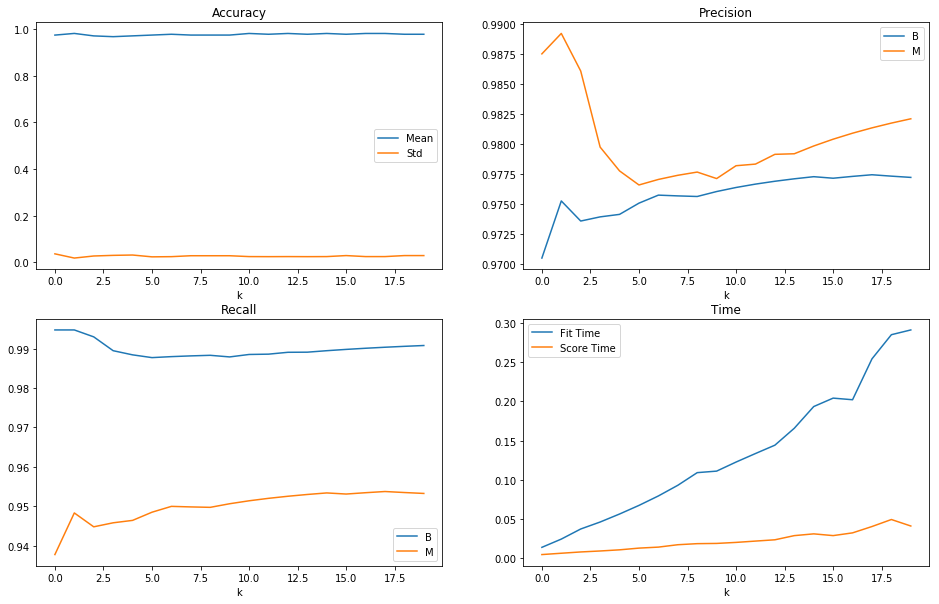

In [216]:
test_rfc(Xdata, Ydata, criterion = "gini", min_samples_split = 2, min_samples_leaf = 1)

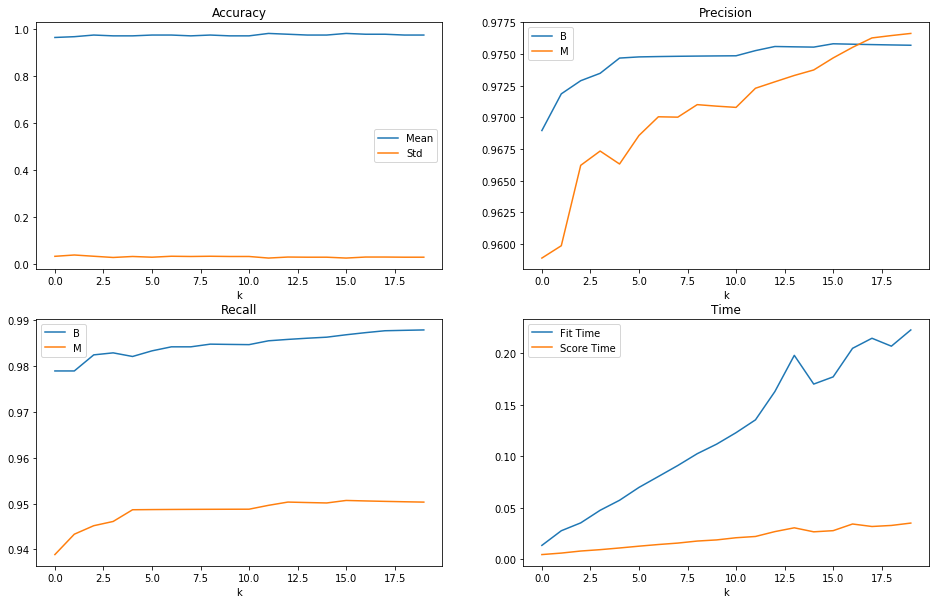

In [217]:
test_rfc(Xdata, Ydata, criterion = "gini", min_samples_split = 5, min_samples_leaf = 1)

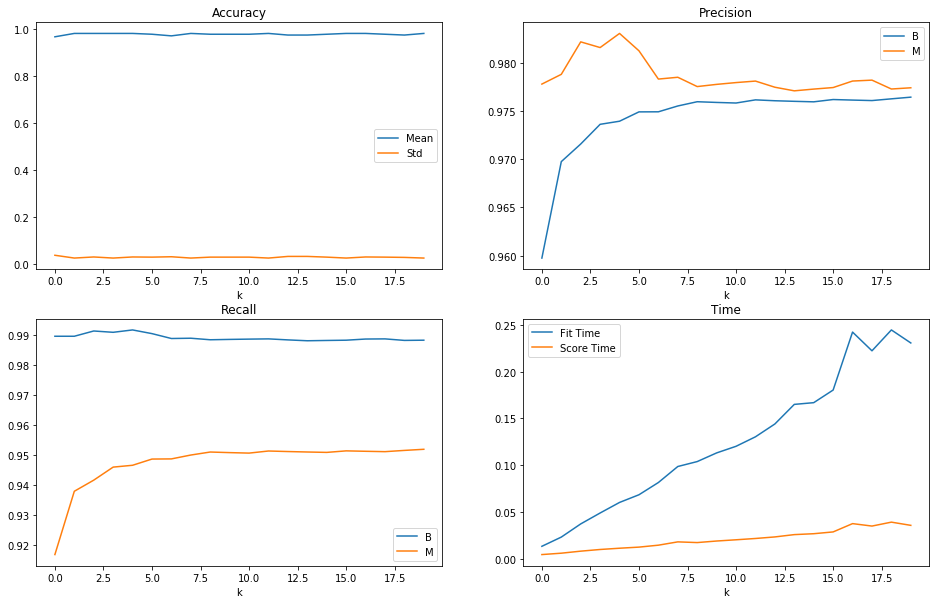

In [218]:
test_rfc(Xdata, Ydata, criterion = "gini", min_samples_split = 10, min_samples_leaf = 1)

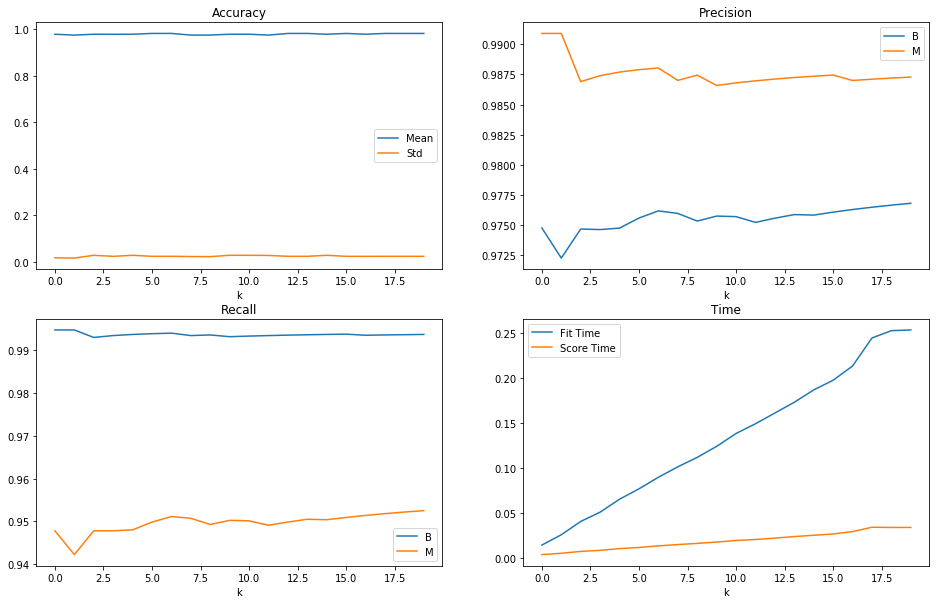

In [219]:
test_rfc(Xdata, Ydata, criterion = "entropy", min_samples_split = 2, min_samples_leaf = 1)

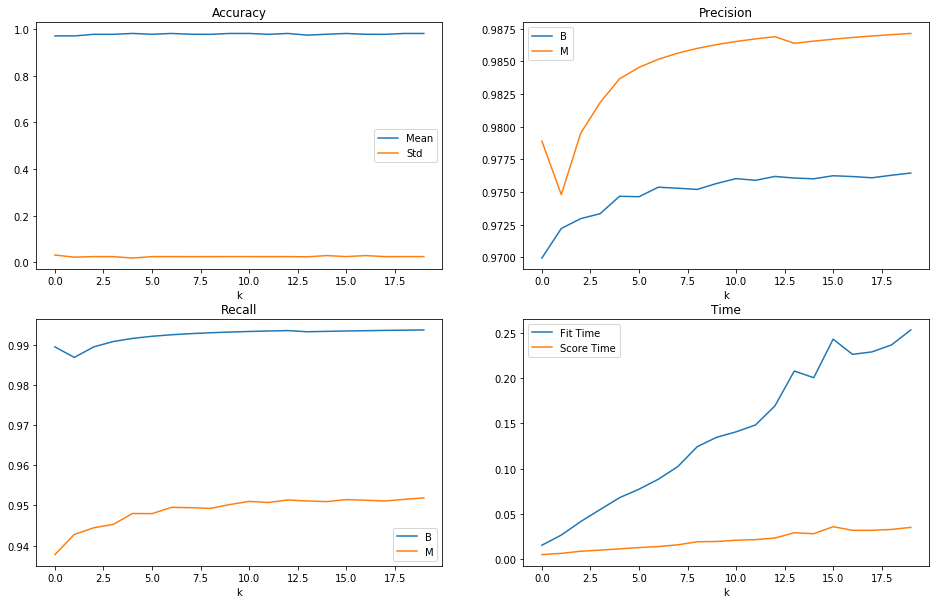

In [220]:
test_rfc(Xdata, Ydata, criterion = "entropy", min_samples_split = 5, min_samples_leaf = 1)

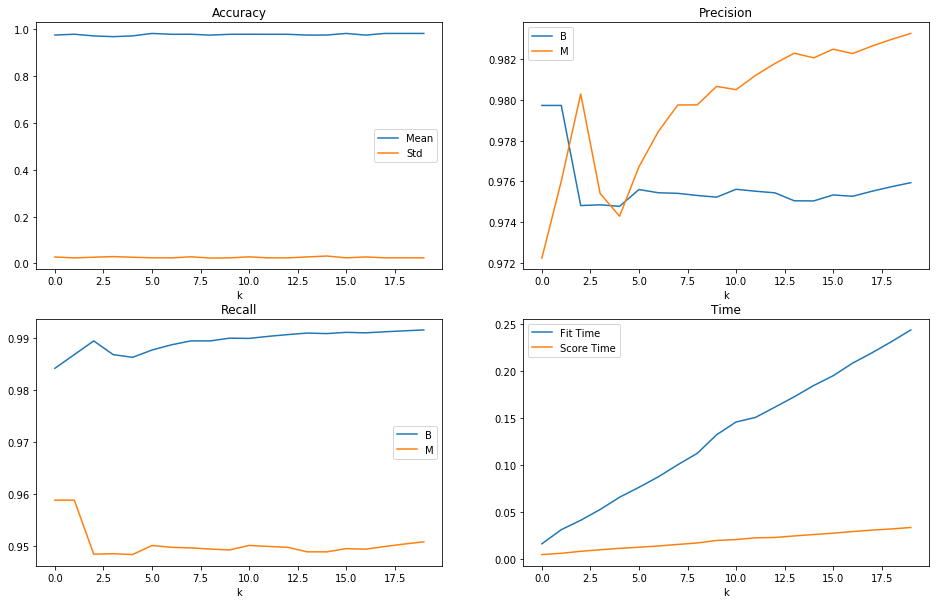

In [221]:
test_rfc(Xdata, Ydata, criterion = "entropy", min_samples_split = 10, min_samples_leaf = 1)